# Class 4_2
#### Matthew Kutugata 
#### 09-19-2019

Bring in data to plot

1. Warm-up

    - Define a 3 X 5 numpy array of random numbers. 
        - Plot the array.
        - Take the mean and standard deviation along the first and second axis. 
                What size are the resulting arrays? 
                Describe what they contain. 
                Plot them.
        - Using logical indexing, change all the values in the array greater than 0.5 to 1
        - Plot the array again
        - Plot the 2X2 bottom left hand corner of the array
        - Find the sum of the array
        - Change the colormap


2. Go over hares/carrots/lynxes problem (1.3.15.3)

3. Examples:
    - Plot y = sin(x) on -pi to pi
    - Go over linespace
    - Turn the grid on
    - Create a color plot of z = sin(x)sin(y) on the interval [−π,π]×[−π,π][−π,π]×[−π,π].
    - Plot an Archimedean spiral (https://en.wikipedia.org/wiki/Archimedean_spiral)
    - Basically they have to translate some r code into python


4. scipy 1.4
    - Now plot a logarithmic spiral (google it)

5. Extras:
- More advanced spiral plotting: https://blog.anvetsu.com/posts/fibonacci-golden-spiral-matplotlib-python/
- Also, a turtle package! https://trinket.io/python/43bc79b582
`

# Warm-up
- Define a 3 X 5 numpy array of random numbers.
- Plot the array. What range are the values in?
- Take the mean and standard deviation along the first and second axis. What size are the resulting arrays? - - ---- Describe what they contain. Plot them.
- Using logical indexing, add one to all the values greater than 0.5
- Plot the array again, along with the new means and standard deviations
- Plot the 2X2 bottom left hand corner of the array
- Find the sum and median of the 2x2 array

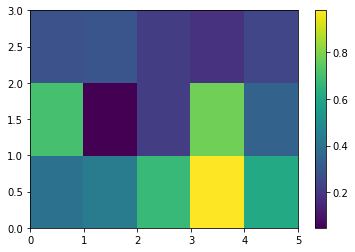

In [256]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = np.random.rand(3,5)
plt.pcolormesh(x)
plt.colorbar()

In [257]:
# this gives you the mean of each column (5 means)
col_mean = np.mean(x, axis=0)
col_std = np.std(x, axis=0)

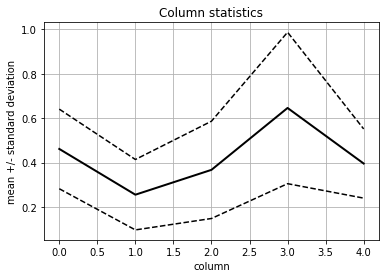

In [258]:
plt.plot(col_mean, 'k', linewidth=2)
plt.plot(col_mean + col_std, 'k--')
plt.plot(col_mean - col_std, 'k--')
plt.xlabel('column')
plt.ylabel('mean +/- standard deviation')
plt.title('Column statistics', fontsize=12)
plt.grid()

In [259]:
# this gives you the mean of each row (3 means)
np.mean(x, axis=1)

array([0.61854759, 0.41566325, 0.2414179 ])

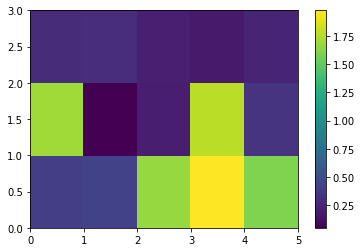

In [260]:
# using logical indexing, add one to all the values greater than 0.5
x[x>0.5]+=1
plt.pcolormesh(x)
plt.colorbar()

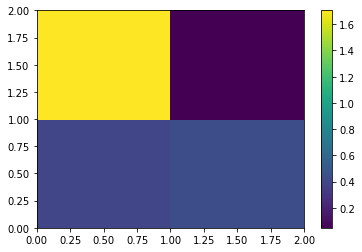

In [261]:
# Plot the 2X2 bottom left hand corner of the array
plt.pcolormesh(x[0:2, 0:2])
plt.colorbar()

In [262]:
x.sum()

11.378143659980015

In [263]:
np.median(x)

0.3351627978518207

# Lecture

In [264]:
y = np.random.rand(300, 500)

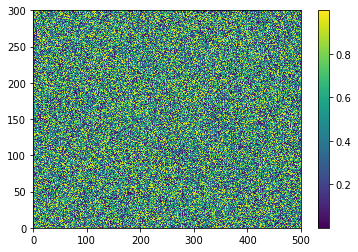

In [265]:
plt.pcolormesh(y)
plt.colorbar()

(array([15162., 14952., 14872., 15394., 14930., 14907., 15112., 14900.,
        15066., 14705.]),
 array([5.58082247e-07, 9.99990608e-02, 1.99997563e-01, 2.99996066e-01,
        3.99994569e-01, 4.99993071e-01, 5.99991574e-01, 6.99990077e-01,
        7.99988580e-01, 8.99987082e-01, 9.99985585e-01]),
 <a list of 10 Patch objects>)

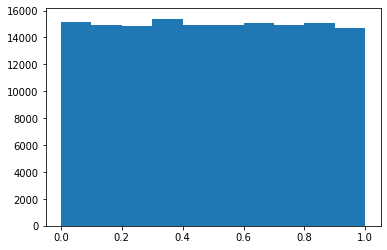

In [266]:
plt.hist(y.flatten())

In [267]:
# add one to all of the values above 0.5:
y[y>0.5] += 1

(array([30114., 30266., 14932.,     0.,     0.,     0.,     0., 14905.,
        30012., 29771.]),
 array([5.58082247e-07, 1.99999061e-01, 3.99997563e-01, 5.99996066e-01,
        7.99994569e-01, 9.99993071e-01, 1.19999157e+00, 1.39999008e+00,
        1.59998858e+00, 1.79998708e+00, 1.99998558e+00]),
 <a list of 10 Patch objects>)

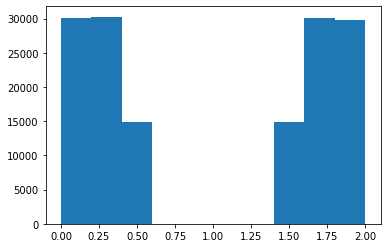

In [268]:
plt.hist(y.flatten())

## Masking

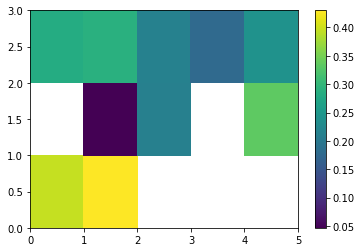

In [269]:
x2 = np.ma.masked_where(x > 1, x)
plt.pcolormesh(x2)
plt.colorbar()

In [270]:
# now the mean will not "see" the masked value: 
x2.mean()

0.26263368358259653

In [271]:
x.mean()

0.7585429106653343

In [ ]:
y2 = np.ma.masked_where(y < 0.5, y)
plt.hist(y2.flatten())
plt.xlim([0,2])

# My Sample Data

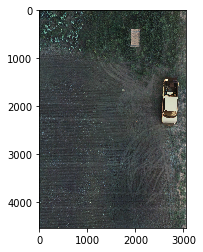

In [325]:
import rasterio
from rasterio.plot import show
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
data_dir ="C:\\Users\\ncu116\\OneDrive - The University of Texas-Rio Grande Valley\\FALL 2019\\Intro to Sci Computing\\Jupyter Notebooks"

raster = rasterio.open('clip.tif')

# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return ((array - array_min) / (array_max  - array_min))

# Convert to numpy arrays
nir = raster.read(5)
red_edge = raster.read(4)
red = raster.read(3)
green = raster.read(2)
blue = raster.read(1)

# Normalize band DN
nirn = normalize(nir)
red_edge = normalize(red_edge)
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

# stack bands
#nrg = np.dstack((nirn, redn, greenn))
bgr = np.dstack((bluen, greenn, redn))
plt.imshow(bgr)

In [280]:
%pwd

'C:\\Users\\ncu116\\OneDrive - The University of Texas-Rio Grande Valley\\FALL 2019\\Intro to Sci Computing\\Jupyter Notebooks'

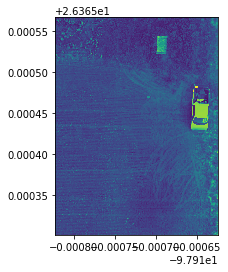

In [335]:
# Data dir
data_dir = "C:\\Users\\ncu116\\OneDrive - The University of Texas-Rio Grande Valley\\FALL 2019\\Intro to Sci Computing\\Jupyter Notebooks"


# Filepath
fp = os.path.join(data_dir, "clip.tif")

# Open the file:
raster = rasterio.open(fp)

# Plot band 1
show((raster, 1))

Text(0.5, 1.0, 'NIR')

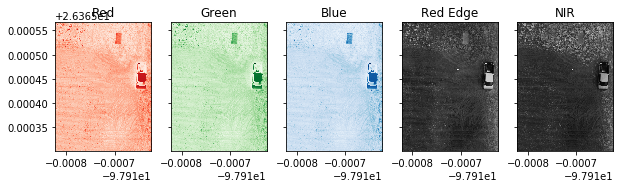

In [336]:
# Initialize subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(ncols=5, nrows=1, figsize=(10, 4), sharey=True)

# Plot Red, Green and Blue (rgb)

show((raster, 3), cmap='Reds', ax=ax1)
show((raster, 2), cmap='Greens', ax=ax2)
show((raster, 1), cmap='Blues', ax=ax3)
show((raster, 4), cmap='gray', ax=ax4)
show((raster, 5), cmap='gray', ax=ax5)

# Add titles
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")
ax4.set_title("Red Edge")
ax5.set_title("NIR")

In [337]:
# Read the grid values into numpy arrays
red = raster.read(3)
green = raster.read(2)
blue = raster.read(1)
red_edge = raster.read(4)
nir = raster.read(5)

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)
red_edgen = normalize(red_edge)
nirn = normalize(nir)

print("Normalized bands")
print(redn.min(), '-', redn.max(), 'mean:', redn.mean())
print(greenn.min(), '-', greenn.max(), 'mean:', greenn.mean())
print(bluen.min(), '-', bluen.max(), 'mean:', bluen.mean())
print(red_edgen.min(), '-', red_edgen.max(), 'mean:', red_edgen.mean())
print(nirn.min(), '-', nirn.max(), 'mean:', nirn.mean())

Normalized bands
0.0 - 1.0 mean: 0.26007401273717434
0.0 - 1.0 mean: 0.2648255145278173
0.0 - 1.0 mean: 0.2403910923227778
0.0 - 1.0 mean: 0.2379447657899469
0.0 - 1.0 mean: 0.23279665714011377


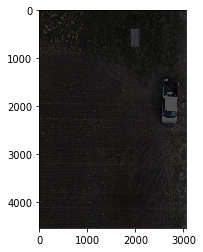

In [338]:
# Create RGB natural color composite
rgb = np.dstack((red, green, blue))

# Let's see how our color composite looks like
plt.imshow(rgb)


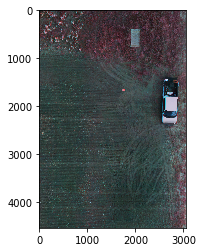

In [339]:
# Read the grid values into numpy arrays
nir = raster.read(4)
red = raster.read(3)
green = raster.read(2)

# Normalize the values using the function that we defined earlier
nirn = normalize(nir)
redn = normalize(red)
greenn = normalize(green)

# Create the composite by stacking
nrg = np.dstack((nirn, redn, greenn))

# Let's see how our color composite looks like
plt.imshow(nrg)

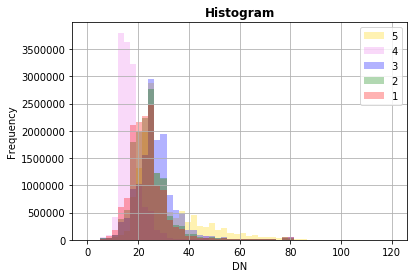

In [340]:
from rasterio.plot import show_hist

show_hist(raster, bins=50, lw=0.0, stacked=False, alpha=0.3,
      histtype='stepfilled', title="Histogram")

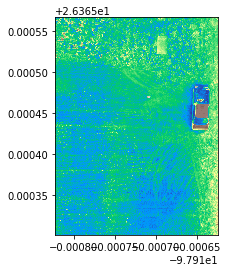

In [341]:
data = rasterio.open(fp)

# Visualize the NIR band
show((data, 4), cmap='terrain')

In [343]:
# Open the raster file in read mode
raster = rasterio.open(fp)

27.04769732466616
16.849017352657118
<class 'numpy.ndarray'>


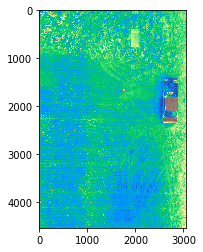

In [344]:

# Read red channel (channel number 3)
red = raster.read(3)
# Read NIR channel (channel number 4)
nir = raster.read(4)

# Calculate some stats to check the data
print(red.mean())
print(nir.mean())
print(type(nir))

# Visualize
show(nir, cmap='terrain')

In [345]:
# Convert to floats
red = red.astype('f4')
nir = nir.astype('f4')
nir

array([[12., 11., 11., ..., 21., 21., 22.],
       [12., 12., 12., ..., 22., 22., 22.],
       [13., 13., 12., ..., 22., 22., 22.],
       ...,
       [15., 15., 15., ..., 28., 28., 28.],
       [14., 15., 15., ..., 28., 28., 28.],
       [14., 15., 16., ..., 28., 29., 29.]], dtype=float32)

In [346]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [347]:
# Calculate NDVI using numpy arrays
ndvi = (nir - red) / (nir + red)

## Calculatting NDVI

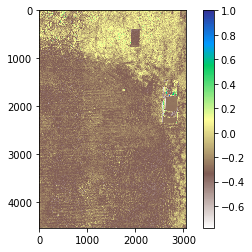

In [348]:
# Plot the NDVI
plt.imshow(ndvi, cmap='terrain_r')
# Add colorbar to show the index
plt.colorbar()
outfp = "./ndvi.jpg"
plt.savefig(outfp, dpi=300)

In [ ]:
%pwd